Explore the bash history of this computer
========

Load the bash history on this computer

In [8]:
from os.path import expanduser
import matplotlib.pyplot as plt
from exploration import words as w
from exploration import corpus as c

home = expanduser("~")
bash_corpus = c.Corpus(home + "/.bash_history")

unigram entropy 5.562319905508989 in file /home/henryp/.bash_history
bigram entropy  6.7107497273141785 in file /home/henryp/.bash_history


In [9]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI n-grams")
    plt.show()
    

The most popular unigrams are:

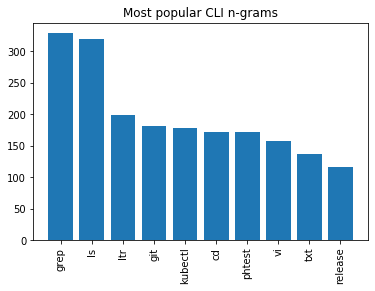

In [10]:
plot_histogram_of(bash_corpus.unigram_count)

The most popular bigrams are:

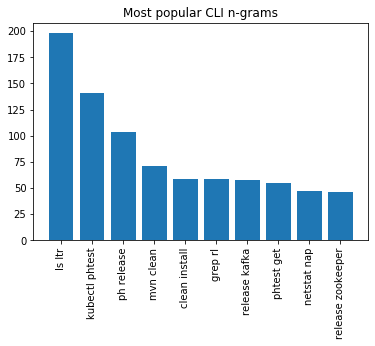

In [11]:
plot_histogram_of(bash_corpus.bigram_count)

The entropy in the corpus:

In [12]:
ngram_range = (1, 3)
hs = bash_corpus.entropy_of(ngram_range)

mean = 6.199578497313709, std dev = 0.11939234329115361 for n-grams in range (1, 3)


Now, with the history from another box albeit by the same programmer

In [13]:
bash_comparison = c.Corpus(home + "/.bash_history3")

hs = bash_comparison.entropy_of(ngram_range)

unigram entropy 5.529673132053276 in file /home/henryp/.bash_history3
bigram entropy  6.635452079555932 in file /home/henryp/.bash_history3
mean = 6.192844602554423, std dev = 0.1038740542701775 for n-grams in range (1, 3)


Let's compare the two

In [14]:
def padding(xs, ys, alpha):
    in_x_not_y = xs - ys
    return list(map(lambda x: [x, alpha], in_x_not_y))

def smoothing(word_count1, word_count2, alpha):
    words1 = w.words_of(word_count1)
    words2 = w.words_of(word_count2)
    padding1 = padding(words2, words1, alpha)
    padding2 = padding(words1, words2, alpha)
    return word_count1 + padding1, word_count2 + padding2

ngrams1 = w.counts_of(bash_corpus.corpus, ngram_range)
ngrams2 = w.counts_of(bash_comparison.corpus, ngram_range)
wc1, wc2 = smoothing(ngrams1, ngrams2, 1e-5)

from scipy.stats import entropy
comparison = entropy(w.probabilities_of(wc1), w.probabilities_of(wc2))
print('Comparative entropy of both corpii = {}'.format(comparison))

Comparative entropy of both corpii = 2.986538889560459
